# Проект по исследованию и созданию модели для прогнозирования стоимости автомобиля

По исследованию нашего проекта создадим модель, которая будет определять стоимость автомобиля в рупиях

Предварительно перед написанием и тестированием модели сделаем анализ предоставленных данных и подметим для себя некоторые интересные моменты

В нашем распоряжении датасет в формате csv взятый из интернета с данными об автомобилях

Поскольку стоимость автомомбиля модет быть любой - перед нами задача регрессии. Для целевой метрики возьмем MSE - средняя сумма квадратной разности между фактическим значением и прогнозируемым значением. 

- Используем данные взятые с kaggle (https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction)

## 1. Начинаем проект с импортирования необходимых библиотек и загрузки данных

Импортируем необходимые бибилиотеки (по мере необходимости будем дополнять данную ячейкеу библиотеками)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/Users/salux/Downloads/car_price.csv')

In [3]:
df2= pd.read_csv('/Users/salux/Downloads/car_price.csv')

In [4]:
df3 = pd.read_csv('/Users/salux/Downloads/car_price.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [6]:
df.head(10)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
5,5,Volkswagen Vento 1.2 TSI Highline AT,7.66 Lakh,"49,719 kms",Petrol,Automatic,1st Owner,2017,1197 cc,5 Seats
6,6,Volkswagen Vento 1.2 TSI Highline Plus AT,7.58 Lakh,"43,688 kms",Petrol,Automatic,1st Owner,2017,1197 cc,5 Seats
7,7,Honda WR-V VX Diesel,11.60 Lakh,"14,470 kms",Diesel,Manual,1st Owner,2021,1498 cc,5 Seats
8,8,Honda City i VTEC CVT SV,6.99 Lakh,"21,429 kms",Petrol,Automatic,1st Owner,2015,1497 cc,5 Seats
9,9,Renault Duster Petrol RXS CVT,7.53 Lakh,"31,750 kms",Petrol,Automatic,1st Owner,2017,1498 cc,5 Seats


### 1.1 Описание данных

Просмотрев первичный набор данных, опишем таблицу и столбцы

 - у нас имеется 10 столбцов по 5512 значений (пропусков не обнаружено на первом этапе)
 - есть как числовые (2 столбца - один из которых полностю дублирует индекс) и много смешанных столбцов типа object
 - также есть следующие столбцы:
   - car_name - наименование марки и модели продаваемого автомобиля.
   - car_prices_in_rupee - стоимость автомобиля в рупиях (используется обозначение Lakh (100 000 рупий), то есть 10 Lakh = 1 000 000 рупий, также есть обозначение Crore (10 000 000) - нужно систематизировать стоимость - перевдеем все в рупии.
   - kms_driven - пробег автомобиля
   - fuel_type - тип используемого топлива для автомобиля
   - transmission - тип трансмиссии 
   - ownership - количество владельцев у автомобиля
   - manufacture - год выпуска
   - engine - объем двигателя в кубических сантиметрах
   - seats - количество пассажиров

### 1.2 Обработка данных

In [7]:
df['transmission'].value_counts()

Manual       3962
Automatic    1550
Name: transmission, dtype: int64

In [8]:
df['Seats'].value_counts()

5 Seats    4673
7 Seats     631
4 Seats      88
6 Seats      61
8 Seats      54
2 Seats       5
Name: Seats, dtype: int64

In [9]:
df['car_name'].value_counts()

Maruti Alto 800 LXI          53
Maruti Swift VXI             46
Maruti Wagon R VXI BS IV     43
Maruti Swift Dzire VDI       42
Maruti Swift Dzire VXI       42
                             ..
Tata New Safari XT            1
Hyundai Creta 1.6 E Plus      1
Toyota Etios 2014-2016 GD     1
Mahindra Marazzo M8 8Str      1
BMW M Series M4 Coupe         1
Name: car_name, Length: 1896, dtype: int64

Удалим двойной индекс 

In [10]:
df = df.drop(['Unnamed: 0'], axis=1)

Проверим результат

In [11]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


В нашем датасете есть несколько важных столбцов в виде object - изменим данный тип данных

Напишем функцию, которая заменит ненужные значения и уберет возможные пробелы в данных

In [12]:
display(df['car_prices_in_rupee'].head())

0    10.03 Lakh
1    12.83 Lakh
2    16.40 Lakh
3     7.77 Lakh
4     5.15 Lakh
Name: car_prices_in_rupee, dtype: object

In [13]:
df.loc[df['car_prices_in_rupee'].str.contains('Lakh'), 'Value'] = 'Lakh'
df.loc[df['car_prices_in_rupee'].str.contains('Crore'), 'Value'] = 'Crore'

In [14]:
c = df.loc[df['car_prices_in_rupee'].str.contains('Crore')]

In [15]:
c

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Value
119,Land Rover Discovery 2.0 R-Dynamic HSE,1.10 Crore,"33,000 kms",Petrol,Automatic,1st Owner,2021,1997 cc,7 Seats,Crore
315,BMW X7 xDrive 40i,1.23 Crore,"13,000 kms",Petrol,Automatic,1st Owner,2019,2998 cc,7 Seats,Crore
857,Toyota Land Cruiser VX,1.58 Crore,"56,000 kms",Diesel,Automatic,1st Owner,2018,2393 cc,5 Seats,Crore
869,Mercedes-Benz GLS 400d 4MATIC,1.17 Crore,"15,000 kms",Diesel,Automatic,2nd Owner,2020,999 cc,5 Seats,Crore
892,Land Rover Range Rover 3.0 Petrol LWB Vogue BSIV,1.92 Crore,"40,000 kms",Petrol,Automatic,1st Owner,2019,1199 cc,5 Seats,Crore
928,Toyota Land Cruiser VX,1.69 Crore,"27,000 kms",Diesel,Automatic,1st Owner,2019,796 cc,5 Seats,Crore
952,Mercedes-Benz S-Class S 350d,1.77 Crore,"1,400 kms",Diesel,Automatic,1st Owner,2022,2499 cc,7 Seats,Crore
1073,Mercedes-Benz G G63 AMG,1.52 Crore,"47,000 kms",Petrol,Automatic,2nd Owner,2017,1199 cc,5 Seats,Crore
1074,Porsche Panamera GTS,1.75 Crore,"10,000 kms",Petrol,Automatic,1st Owner,2019,1950 cc,5 Seats,Crore
1167,BMW X5 xDrive 30d xLine,1 Crore,"20,500 kms",Diesel,Automatic,1st Owner,2022,1995 cc,5 Seats,Crore


In [16]:
df['Value'].value_counts()

Lakh     5333
Crore      56
Name: Value, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
 9   Value                5389 non-null   object
dtypes: int64(1), object(9)
memory usage: 430.8+ KB


In [18]:
df['Value'].unique()

array(['Lakh', 'Crore', nan], dtype=object)

In [19]:
df=df.dropna()

In [20]:
df['Value'].unique()

array(['Lakh', 'Crore'], dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5389 non-null   object
 1   car_prices_in_rupee  5389 non-null   object
 2   kms_driven           5389 non-null   object
 3   fuel_type            5389 non-null   object
 4   transmission         5389 non-null   object
 5   ownership            5389 non-null   object
 6   manufacture          5389 non-null   int64 
 7   engine               5389 non-null   object
 8   Seats                5389 non-null   object
 9   Value                5389 non-null   object
dtypes: int64(1), object(9)
memory usage: 463.1+ KB


In [22]:
def convert_currency(val):
    """
    Уберем со столбцов с типом данных object ненужные символы:
     - удаляем Lakh (оставим этот вариант в заголовке для понимания переменной - либо умножим на 100 000 и сделаем числом рупии)
     - удаляем Crore (предварительно умножим на 100 - доведем до переменной Лакх)
     - удаляем kms ()
     - удалим cc и оставим только значение в кубических сантиметрах
    """
    new_val = val.replace('Lakh', '').replace('Seats','').replace('kms', '').replace('cc', '').replace(',', '').replace(' ', '').replace('Crore','')
    return new_val

Поочередно применим функцию в наш датасет

In [23]:
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(convert_currency)
df['kms_driven'] = df['kms_driven'].apply(convert_currency)
df['engine'] = df['engine'].apply(convert_currency)
df['Seats'] = df['Seats'].apply(convert_currency)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5389 non-null   object
 1   car_prices_in_rupee  5389 non-null   object
 2   kms_driven           5389 non-null   object
 3   fuel_type            5389 non-null   object
 4   transmission         5389 non-null   object
 5   ownership            5389 non-null   object
 6   manufacture          5389 non-null   int64 
 7   engine               5389 non-null   object
 8   Seats                5389 non-null   object
 9   Value                5389 non-null   object
dtypes: int64(1), object(9)
memory usage: 463.1+ KB


In [25]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Value
0,Jeep Compass 2.0 Longitude Option BSIV,10.03,86226,Diesel,Manual,1st Owner,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,12.83,13248,Petrol,Automatic,1st Owner,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,16.40,60343,Petrol,Automatic,1st Owner,2016,2494,5,Lakh
3,Honda Jazz VX CVT,7.77,26696,Petrol,Automatic,1st Owner,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,5.15,69414,Petrol,Manual,1st Owner,2016,1199,5,Lakh


In [26]:
df['kms_driven']=df['kms_driven'].astype('int')
df['Seats']=df['Seats'].astype('int')
df['engine']=df['engine'].astype('int')

In [27]:
df['car_prices_in_rupee'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5389 entries, 0 to 5511
Series name: car_prices_in_rupee
Non-Null Count  Dtype 
--------------  ----- 
5389 non-null   object
dtypes: object(1)
memory usage: 84.2+ KB


Сменим тип данных на числовой

In [28]:
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].astype('float')

Переведем все значения суммы Crore в Lakh - умножим значение Crore на 100 (Crore - 10 000 000 рупий, Lakh - 100 000 рупий)

In [29]:
df['car_prices_in_rupee']=np.where(df['Value'] == 'Crore',
                                           df['car_prices_in_rupee'] * 100,
                                           df['car_prices_in_rupee'])

Умножим все значения в таблице на 100 000 - сделаем все цены в рупиях для удобства подсчетов

In [30]:
df['car_prices_in_rupee'] = df['car_prices_in_rupee']*100000


Проверим результат в отдельно взятом столбце и в целом по таблице

In [31]:
df['car_prices_in_rupee'].head(10)

0    1003000.0
1    1283000.0
2    1640000.0
3     777000.0
4     515000.0
5     766000.0
6     758000.0
7    1160000.0
8     699000.0
9     753000.0
Name: car_prices_in_rupee, dtype: float64

In [32]:
df.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Value
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,Lakh
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1st Owner,2021,1330,5,Lakh
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5,Lakh
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1st Owner,2018,1199,5,Lakh
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1st Owner,2016,1199,5,Lakh


Отличный результат - но есть еще суммы сразу заданные в рупиях - разберемся с ними (в данный момент они тоже умножены на 100 000)

Проверим вторую таблицу (копию) нашего изначального датафрейма - увидим что она неизменна от стартовой - работаем с ней. Затем объединим таблицы

In [33]:
df2.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


Проведем аналогичные манипуляции со второй таблицей для значений сразу в рупиях

In [34]:
df2=df2[df2["car_prices_in_rupee"].str.contains("Lakh")==False]
df2=df2[df2["car_prices_in_rupee"].str.contains("Crore")==False]
df2['kms_driven']=df2['kms_driven'].str.replace(' kms','')
df2['kms_driven']=df2['kms_driven'].str.replace(',','')
df2['Seats']=df2['Seats'].str.replace(' Seats','')
df2['engine']=df2['engine'].str.replace(' cc','')
df2['car_prices_in_rupee']=df2['car_prices_in_rupee'].str.replace(',','')
df2['car_prices_in_rupee']=df2['car_prices_in_rupee'].astype('int')
df2['kms_driven']=df2['kms_driven'].astype('int')
df2['Seats']=df2['Seats'].astype('int')
df2['engine']=df2['engine'].astype('int')

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 238 to 5439
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           123 non-null    int64 
 1   car_name             123 non-null    object
 2   car_prices_in_rupee  123 non-null    int64 
 3   kms_driven           123 non-null    int64 
 4   fuel_type            123 non-null    object
 5   transmission         123 non-null    object
 6   ownership            123 non-null    object
 7   manufacture          123 non-null    int64 
 8   engine               123 non-null    int64 
 9   Seats                123 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 10.6+ KB


In [36]:
df2.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
238,238,Maruti Swift 1.3 LXI,99999,80000,Petrol,Manual,3rd Owner,2007,1298,5
243,243,Maruti Zen LX,55000,90000,Petrol,Manual,3rd Owner,2002,993,5
342,342,Maruti Alto LXi BSIII,84778,70229,Petrol,Manual,4th Owner,2008,796,5
675,675,Maruti Esteem VX - BSII,59000,60000,Petrol,Manual,1st Owner,2007,1497,5
734,734,Hyundai Santro Xing GL,90000,80000,Petrol,Manual,2nd Owner,2008,2993,5


In [37]:
df3=[df,df2]
df=pd.concat(df3)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5439
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   int64  
 8   Seats                5512 non-null   int64  
 9   Value                5389 non-null   object 
 10  Unnamed: 0           123 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 516.8+ KB


In [39]:
df.drop_duplicates()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Value,Unnamed: 0
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,Lakh,NaN
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1st Owner,2021,1330,5,Lakh,NaN
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5,Lakh,NaN
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1st Owner,2018,1199,5,Lakh,NaN
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1st Owner,2016,1199,5,Lakh,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5050,Maruti Wagon R LXI Minor,82642.0,166155,Petrol,Manual,2nd Owner,2008,1461,5,NaN,5050.0
5094,Chevrolet Spark 1.0 PS,73582.0,89133,Petrol,Manual,1st Owner,2009,1497,5,NaN,5094.0
5149,Chevrolet Spark 1.0 LS LPG,59736.0,192340,Lpg,Manual,2nd Owner,2010,1390,5,NaN,5149.0
5177,Tata Indica TDI LS,95633.0,130265,Diesel,Manual,2nd Owner,2013,1197,5,NaN,5177.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5439
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   int64  
 8   Seats                5512 non-null   int64  
 9   Value                5389 non-null   object 
 10  Unnamed: 0           123 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 516.8+ KB


In [41]:
df.head(15)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,Value,Unnamed: 0
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,Lakh,NaN
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1st Owner,2021,1330,5,Lakh,NaN
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5,Lakh,NaN
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1st Owner,2018,1199,5,Lakh,NaN
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1st Owner,2016,1199,5,Lakh,NaN
5,Volkswagen Vento 1.2 TSI Highline AT,766000.0,49719,Petrol,Automatic,1st Owner,2017,1197,5,Lakh,NaN
6,Volkswagen Vento 1.2 TSI Highline Plus AT,758000.0,43688,Petrol,Automatic,1st Owner,2017,1197,5,Lakh,NaN
7,Honda WR-V VX Diesel,1160000.0,14470,Diesel,Manual,1st Owner,2021,1498,5,Lakh,NaN
8,Honda City i VTEC CVT SV,699000.0,21429,Petrol,Automatic,1st Owner,2015,1497,5,Lakh,NaN
9,Renault Duster Petrol RXS CVT,753000.0,31750,Petrol,Automatic,1st Owner,2017,1498,5,Lakh,NaN


In [42]:
df= df.drop(columns = ['Value','Unnamed: 0'],axis = 1)

In [43]:
df.columns = df.columns.str.lower()

In [44]:
df.columns

Index(['car_name', 'car_prices_in_rupee', 'kms_driven', 'fuel_type',
       'transmission', 'ownership', 'manufacture', 'engine', 'seats'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 5439
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             5512 non-null   object 
 1   car_prices_in_rupee  5512 non-null   float64
 2   kms_driven           5512 non-null   int64  
 3   fuel_type            5512 non-null   object 
 4   transmission         5512 non-null   object 
 5   ownership            5512 non-null   object 
 6   manufacture          5512 non-null   int64  
 7   engine               5512 non-null   int64  
 8   seats                5512 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 430.6+ KB


### Анализ полученных данных

Построим гистрограмму по распределению автомобилей по году выпуска с завода - сделаем несколько выводов по данной гистограмме

<AxesSubplot:title={'center':'Количество машин выпущенных по годам'}, ylabel='Frequency'>

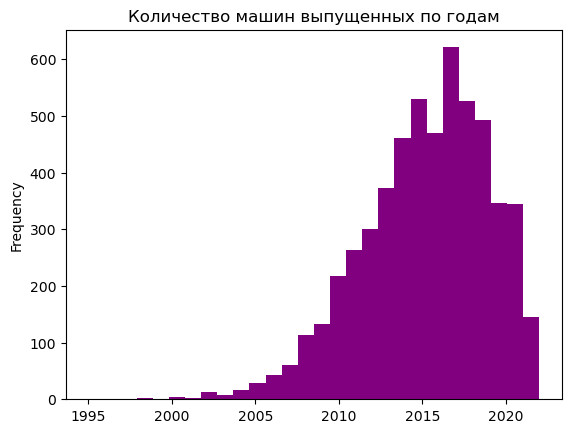

In [46]:
df['manufacture'].plot(kind='hist', bins=28, title='Количество машин выпущенных по годам', color='purple')

Отобразим изменения средней стоимости автомобиля относительно общего количества мест в машине

<AxesSubplot:title={'center':'Средняя стоимость автомобилей с разным количеством посадочных мест'}, xlabel='seats'>

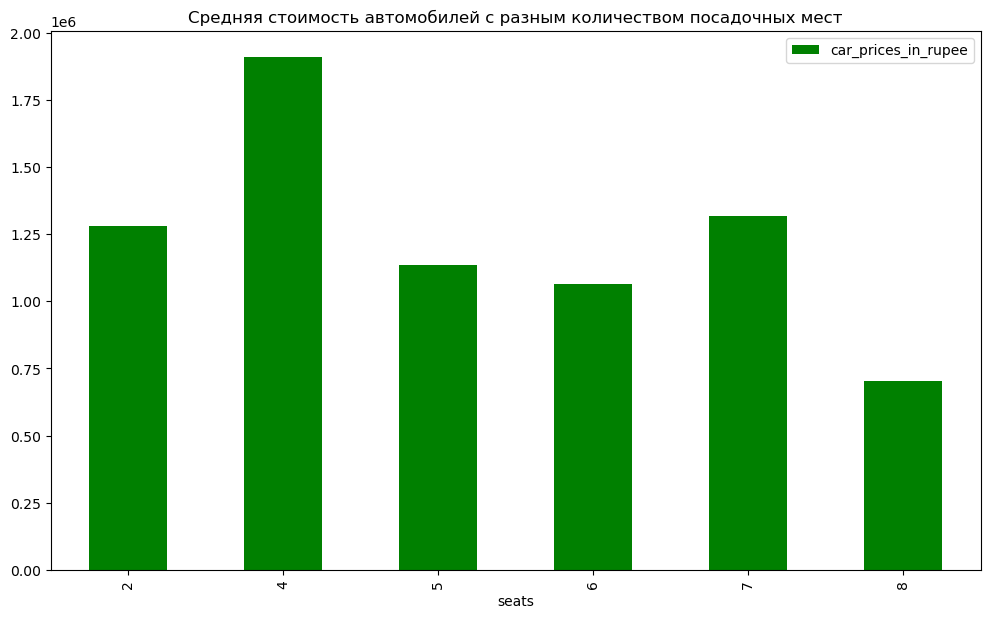

In [47]:
seats_pivot = pd.pivot_table(df, index=['seats'], values = ['car_prices_in_rupee'],aggfunc = 'mean')
seats_pivot.plot(kind='bar', figsize=(12,7), title='Средняя стоимость автомобилей с разным количеством посадочных мест', color='green')

Построим график средней стоимости машины от даты выхода с конвейера 

<AxesSubplot:title={'center':'Средняя стоимость автомобилей по году производства'}, xlabel='manufacture'>

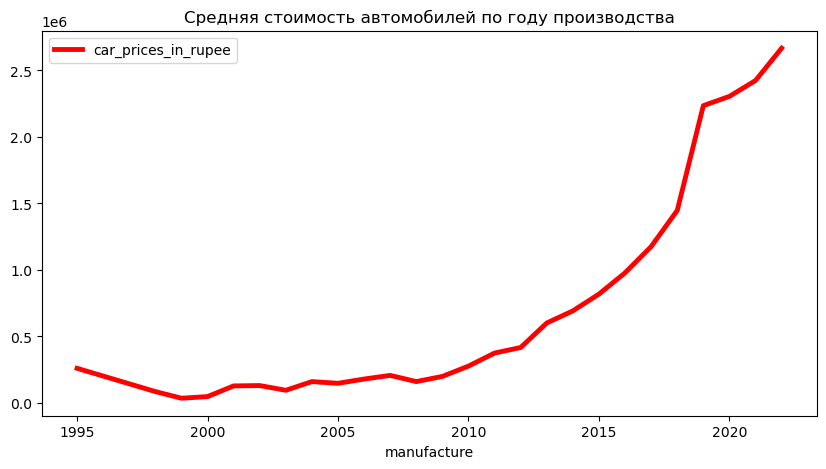

In [48]:
manufacture_pivot=pd.pivot_table(df, index=['manufacture'],values = ['car_prices_in_rupee'],aggfunc = 'mean') 
manufacture_pivot.plot(kind='line',linewidth=3.5,figsize=(10,5),title='Средняя стоимость автомобилей по году производства', color='red')

In [49]:
pip install phik==0.10.0

Note: you may need to restart the kernel to use updated packages.


In [50]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [51]:
df.phik_matrix()

interval columns not set, guessing: ['car_prices_in_rupee', 'kms_driven', 'manufacture', 'engine', 'seats']


/Users/salux/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:55: UserWarning: The number of unique values of variable car_name is very large: 1896. Are you sure this is not an interval variable? Analysis for pairs of variables including car_name might be slow.
  warnings.warn(


,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,seats
car_name,1.000000,0.992371,0.900358,1.000000,1.000000,0.827880,0.953630,0.332088,0.445808
car_prices_in_rupee,0.992371,1.000000,0.163832,0.253952,0.755443,0.128720,0.265497,0.254843,0.044702
kms_driven,0.900358,0.163832,1.000000,0.244524,0.198179,0.276687,0.509671,0.000000,0.035382
fuel_type,1.000000,0.253952,0.244524,1.000000,0.136723,0.075301,0.220763,0.204154,0.062893
transmission,1.000000,0.755443,0.198179,0.136723,1.000000,0.128300,0.257573,0.264393,0.029964
ownership,0.827880,0.128720,0.276687,0.075301,0.128300,1.000000,0.393195,0.044492,0.048158
manufacture,0.953630,0.265497,0.509671,0.220763,0.257573,0.393195,1.000000,0.037335,0.000000
engine,0.332088,0.254843,0.000000,0.204154,0.264393,0.044492,0.037335,1.000000,0.218377
seats,0.445808,0.044702,0.035382,0.062893,0.029964,0.048158,0.000000,0.218377,1.000000


## Тестирование моделей

In [52]:
features = df.drop('car_prices_in_rupee', axis=1)
target = df['car_prices_in_rupee']

In [53]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=100)

In [54]:
print(features_train.shape)
print(features_test.shape)

(4409, 8)
(1103, 8)


In [55]:
features_train_ohe=pd.get_dummies(features_train, drop_first=True)
features_test_ohe=pd.get_dummies(features_test, drop_first=True)

In [56]:
model_for = RandomForestRegressor(random_state=100)

In [57]:
parametrs = { 'n_estimators': range (10, 17),
              'max_depth': range (1,9, 2)}
              #'min_samples_leaf': range (5,8),
              #'min_samples_split': range (6,10,2) }

In [58]:
%%time
grid_forest = GridSearchCV(model_for, parametrs, cv=5, verbose=2)
grid_forest.fit(features_train_ohe, target_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.3s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.3s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.3s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.3s
[CV] END .......................max_depth=1, n_estimators=10; total time=   0.3s
[CV] END .......................max_depth=1, n_estimators=11; total time=   0.3s
[CV] END .......................max_depth=1, n_estimators=11; total time=   0.3s
[CV] END .......................max_depth=1, n_estimators=11; total time=   0.3s
[CV] END .......................max_depth=1, n_estimators=11; total time=   0.4s
[CV] END .......................max_depth=1, n_estimators=11; total time=   0.3s
[CV] END .......................max_depth=1, n_estimators=12; total time=   0.3s
[CV] END .......................max_depth=1, n_

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=100),
             param_grid={'max_depth': range(1, 9, 2),
                         'n_estimators': range(10, 17)},
             verbose=2)

In [59]:
grid_forest.best_params_

{'max_depth': 7, 'n_estimators': 11}

In [60]:
grid_forest.best_score_

0.6567700098216708

In [61]:
model_for = RandomForestRegressor(max_depth=7, n_estimators=11, random_state=100)

In [62]:
model_for.fit(features_train_ohe, target_train)

RandomForestRegressor(max_depth=7, n_estimators=11, random_state=100)

In [63]:
print("X_predict", X_predict.columns)
print("X_train", X_train.columns)

NameError: name 'X_predict' is not defined

In [ ]:
#predict = model_for.predict(features_test_ohe)